In [9]:
%matplotlib inline

import numpy as np
import power_laws
import matplotlib.colors
import seaborn
import pandas as pd
import rubisco_data
import stats_utils

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from scipy import stats
from matplotlib import pyplot as plt

In [15]:
species = kin_df.species

spinach_means = map(float, '28.2 30.3 29 29.2 28.8 27.2 27.5'.split(' '))
spinach_stds = map(float, '2 0.8 0.3 2 0.9 1.1 3.2'.split(' '))
mean, std = stats_utils.combine_dists(spinach_means, spinach_stds)
print('Mean, stddev for spinach')
print('%.2f %.2f' % (mean, std))

Mean, stddev for spinach
28.59 1.99


In [16]:
rubrum_means = map(float, '17.5 23 19.6 22.2'.split(' '))
rubrum_stds = map(float, '1.6 0.6 0.4 2.1'.split(' '))
mean, std = stats_utils.combine_dists(rubrum_means, rubrum_stds)
print('Mean, stddev for R. rubrum')
print('%.2f %.2f' % (mean, std))

Mean, stddev for R. rubrum
20.59 2.59


In [27]:
kin_df = pd.read_excel('../data/AF_KIE_analysis.xlsx', sheet_name='pruned_kinetics')

# Group by RuBisCO form
grouped_form = kin_df.groupby('isoform')

# Markers we use for plotting below.
markers = 'o><^dsphH*'

cnames = ["windows blue", "amber", "greyish brown", "dusty purple", "dusty teal", "dusty red", ]
named_colors = seaborn.xkcd_palette(cnames)

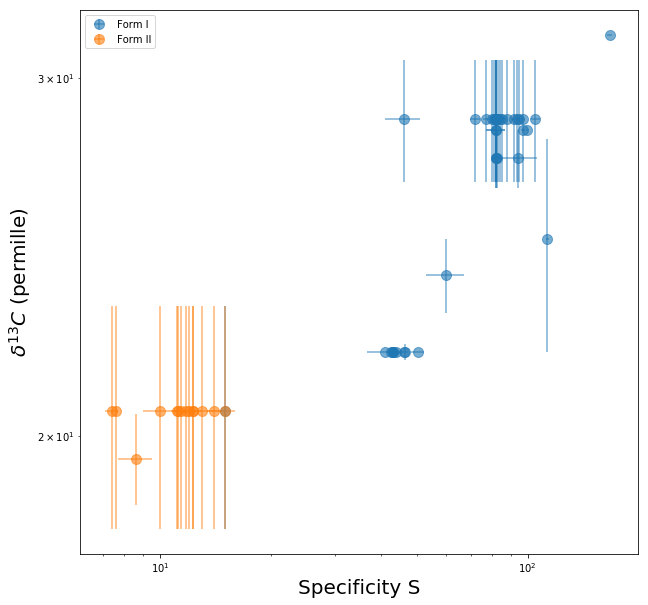

In [43]:
figure = plt.figure(figsize=(10,10))

# loglog scale
plt.xscale('log')
plt.yscale('log')

groups = {'1': 'I', 
          '2': 'II',
          '2_3': 'II/III', 
          '3': 'III'}

for i, (group, gdf) in enumerate(grouped_form):
    label = 'Form %s' % groups[str(group)]
    
    c = named_colors[i]
    plt.errorbar(gdf.S, gdf.d13C_permil, xerr=gdf.S_SD, yerr=gdf.d13c_SD, ls='', marker='o',
                 markersize=10, alpha=0.6, label=label)

plt.legend(loc=2)
plt.xlabel('Specificity S', fontsize=20)
plt.ylabel('$\delta^{13}C$ (permille)', fontsize=20)

plt.show()

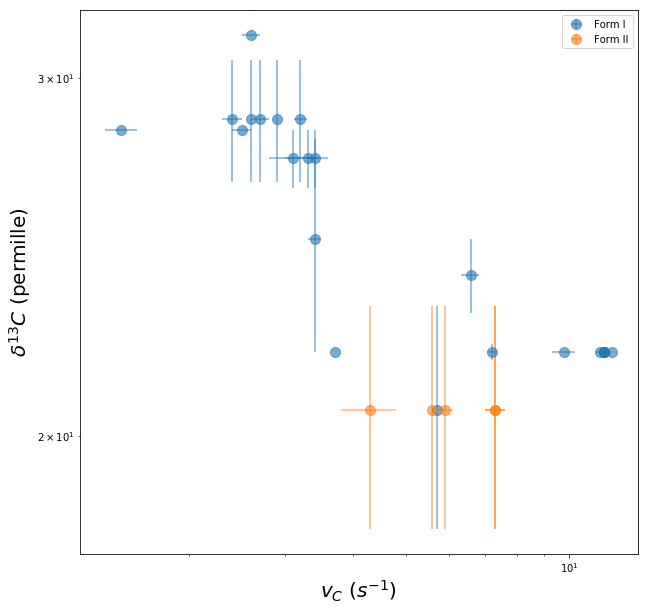

In [40]:
figure = plt.figure(figsize=(10,10))

# loglog scale
plt.xscale('log')
plt.yscale('log')

groups = {'1': 'I', 
          '2': 'II',
          '2_3': 'II/III', 
          '3': 'III'}

for i, (group, gdf) in enumerate(grouped_form):
    label = 'Form %s' % groups[str(group)]
    
    c = named_colors[i]
    plt.errorbar(gdf.vC, gdf.d13C_permil, xerr=gdf.vC_SD, yerr=gdf.d13c_SD, ls='', marker='o',
                 markersize=10, alpha=0.6, label=label)

plt.legend(loc=1)
plt.xlabel('$v_C$ ($s^{-1}$)', fontsize=20)
plt.ylabel('$\delta^{13}C$ (permille)', fontsize=20)
plt.show()

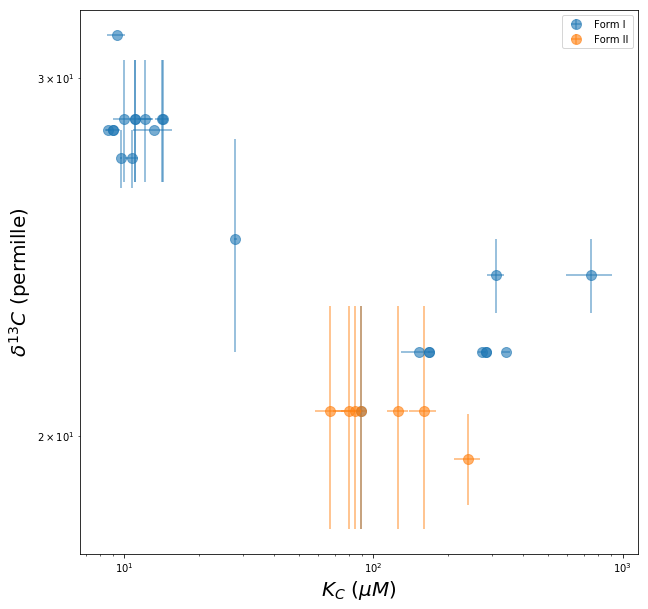

In [42]:
figure = plt.figure(figsize=(10,10))

# loglog scale
plt.xscale('log')
plt.yscale('log')

groups = {'1': 'I', 
          '2': 'II',
          '2_3': 'II/III', 
          '3': 'III'}

for i, (group, gdf) in enumerate(grouped_form):
    label = 'Form %s' % groups[str(group)]
    
    c = named_colors[i]
    plt.errorbar(gdf.KC, gdf.d13C_permil, xerr=gdf.KC_SD, yerr=gdf.d13c_SD, ls='', marker='o',
                 markersize=10, alpha=0.6, label=label)

plt.legend(loc=1)
plt.xlabel('$K_C$ ($\mu M$)', fontsize=20)
plt.ylabel('$\delta^{13}C$ (permille)', fontsize=20)
plt.show()